In [1]:
# CONSTANTES COLLABORATIVE FILTERING

# CAMINHOS

# 
PATH_TO_FULL_CF_FILE = "../../preprocessed-data/CF/data_cf.pkl"

PATH_TO_MOVIES_CF_FILE = "../../preprocessed-data/CF/movies_cf.pkl"

PATH_TO_RATINGS_CF_FILE = "../../preprocessed-data/CF/ratings_cf.pkl"

# DataFrames Names

# data_cf = arquivo completo 
# movies_cf = arquivos de filmes
# ratings_cf = arquivos de ratings

# KNN
N_NEIGHBORS = 11

In [2]:
# Importando bibliotecas necessárias
import pandas as pd
pd.set_option("display.max_rows", 25)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns

import sys

# Importando garbage collector
import gc

# Importando bibliotecas para o sistema de recomendação
import scipy.sparse as sparse # Matriz esparsa (csr_matrix)

# Importando sklearn
import sklearn
from sklearn.neighbors import NearestNeighbors

# Importando Regular Expression operations
import re

# 1 - Preparação dos dados para Collaborative Filtering

In [3]:
# Definindo Função que carrega os arquivos da pasta CF
def load_cf_files(full_file=True, movie_file=False, ratings_file=False):
    if(full_file):
        # Carregando o arquivo pré processado completo
        data_cf = pd.read_pickle(PATH_TO_FULL_CF_FILE)
        data_cf = data_cf[["movieId", "title", "userId", "rating"]] # Reajustando ordem das colunas
        
        print("Arquivo completo: Carregado com sucesso!")
    else:
        print("Arquivo completo: Não foi carregado, verifique os parâmetros para ver se essa era a intenção!")
        
    if(movie_file):
        # Carregando arquivo de filmes
        movies_cf = pd.read_pickle(PATH_TO_MOVIES_CF_FILE)
        print("Arquivo de filmes: Carregado com sucesso!")
    else:
        print("Arquivo de filmes: Não foi carregado, verifique os parâmetros para ver se essa era a intenção!")
        
    if(ratings_file):
        ratings_cf = pd.read_pickle(PATH_TO_RATINGS_CF_FILE)
        print("Arquivo de ratings: Carregado com sucesso!")
    else:
        print("Arquivo de ratings: Não foi carregado, verifique os parâmetros para ver se essa era a intenção!")
        
    #definindo retornos
    if("data_cf" in locals()):
        if("movies_cf" in locals()):
            if("ratings_cf" in locals()):
                return data_cf, movies_cf, ratings_cf
            else:
                return data_cf, movies_cf
        else:
            return data_cf
    elif("movies_cf" in locals()):
        if("ratings_cf" in locals()):
            return movies_cf, ratings_cf
        else:
            return movies_cf
    elif("ratings_cf" in locals()):
        return ratings_cf
    
    else:
        return None

In [4]:
# Chamando função de carregar os arquivos
data_cf, movies_cf= load_cf_files(full_file=True, movie_file=True, ratings_file=False)

Arquivo completo: Carregado com sucesso!
Arquivo de filmes: Carregado com sucesso!
Arquivo de ratings: Não foi carregado, verifique os parâmetros para ver se essa era a intenção!


In [5]:
# CONSTANTES CONTENT BASED

# CAMINHOS

PATH_TO_FULL_CB_FILE = "../preprocessed-data/CB/data_cb.pkl"

PATH_TO_MOVIES_CB_FILE = "../preprocessed-data/CB/movies_cb.pkl"

PATH_TO_RATINGS_CB_FILE = "../preprocessed-data/CB/ratings_cb.pkl"

PATH_TO_RATINGS_INFOS_CB_FILE = "../preprocessed-data/CB/ratings_info_cb.pkl"

PATH_TO_TAG_RELEVANCE_GROUPED_CB_FILE = "../preprocessed-data/CB/tag_relevance_grouped_cb.pkl"

PATH_TO_TAG_RELEVANCE_CB_FILE = "../preprocessed-data/CB/tag_relevance_cb.pkl"

PATH_TO_TAGS_PROCESSED_CB_FILE = "../preprocessed-data/CB/tags_processed_cb.pkl"

# DataFrames Names

# data_cb = arquivo completo 
# movies_cb = arquivos de filmes
# ratings_cb = arquivos de ratings
# ratings_infos_cb = arquivos de informações sobre os ratings
# tag_relevance_grouped_cb = relevancia de tags após o agrupamento
# tag_relevance_cb = relevancia de tags original
# tags_processed_cb = tags todas juntas em uma coluna e processadas pelo nltk

In [6]:
def load_cb_files(full=True, movies=False, ratings=False, ratings_infos=False ,relevance_grouped=False, relevance=False, tags_processed=False):
    data_cb = None
    movies_cb = None 
    ratings_cb = None
    ratings_infos_cb = None
    tag_relevance_grouped_cb = None
    tag_relevance_cb = None
    tags_processed_cb = None
    
    # Caso se queira carregar o completo
    if(full):
        data_cb = pd.read_pickle(PATH_TO_FULL_CB_FILE)
        print("Arquivo completo: Carregado com sucesso!")
    else:
        print("Arquivo completo: Não foi carregado, verifique se era o que desejava.")
    
    # Caso queira-se carregar o arquivo de filmes
    if(movies):
        movies_cb = pd.read_pickle(PATH_TO_MOVIES_CB_FILE)
        print("Arquivo movies: Carregado com sucesso!")
    else:
        print("Arquivo movies: Não foi carregado, verifique se era o que desejava.")
        
    if(ratings):
        ratings_cb = pd.read_pickle(PATH_TO_RATINGS_CB_FILE)
        print("Arquivo ratings: Carregado com sucesso!")
    else:
        print("Arquivo ratings: Não foi carregado, verifique se era o que desejava.")
    
    if(ratings_infos):
        ratings_infos_cb = pd.read_pickle(PATH_TO_RATINGS_INFOS_CB_FILE)
        print("Arquivo ratings infos: Carregado com sucesso!")
    else:
        print("Arquivo ratings infos: Não foi carregado, verifique se era o que desejava.")
        
    if(relevance_grouped):
        tag_relevance_grouped_cb = pd.read_pickle(PATH_TO_TAG_RELEVANCE_GROUPED_CB_FILE)
        print("Arquivo relevance grouped: Carregado com sucesso!")
    else:
        print("Arquivo relevance grouped: Não foi carregado, verifique se era o que desejava.")
    
    if(relevance):
        tag_relevance_cb = pd.read_pickle(PATH_TO_TAG_RELEVANCE_CB_FILE)
        print("Arquivo relevance: Carregado com sucesso!")
    else:
        print("Arquivo relevance: Não foi carregado, verifique se era o que desejava.")
        
    if(tags_processed):
        tags_processed_cb = pd.read_pickle(PATH_TO_TAGS_PROCESSED_CB_FILE)
        print("Arquivo tags processed: Carregado com sucesso!")
    else:
        print("Arquivo tags processed: Não foi carregado, verifique se era o que desejava.")
        
        
    return data_cb, movies_cb, ratings_cb, ratings_infos_cb, tag_relevance_grouped_cb, tag_relevance_cb, tags_processed_cb
    

In [7]:
data_cb, movies_cb, ratings_cb, ratings_infos_cb, tag_relevance_grouped_cb, tag_relevance_cb, tags_processed_cb = load_cb_files(full=False, movies=False, ratings=True, ratings_infos=True, tags_processed=False)

Arquivo completo: Não foi carregado, verifique se era o que desejava.
Arquivo movies: Não foi carregado, verifique se era o que desejava.
Arquivo ratings: Carregado com sucesso!
Arquivo ratings infos: Carregado com sucesso!
Arquivo relevance grouped: Não foi carregado, verifique se era o que desejava.
Arquivo relevance: Não foi carregado, verifique se era o que desejava.
Arquivo tags processed: Não foi carregado, verifique se era o que desejava.


### 1.1 - Problemas do Collaborative Filtering:
<ul>
    <li>Esparsidade</li>
    <li>Cold Start</li>
</ul>

#### Técnicas possíveis:
<ul>
    <li><b>Algoritmos não probabilisticos:</b></li>
    <li>User-based nearest neighbor</li>
    <li>Item-based nearest neighbor</li>
    <li>Reducing dimensionality</li>
</ul>

<ul>
    <li><b>Algoritmos probabilisticos:</b></li>
    <li>Bayesian-network model</li>
    <li>Expectation-minimization</li>
</ul>


Ver: https://pub.towardsai.net/recommendation-system-in-depth-tutorial-with-python-for-netflix-using-collaborative-filtering-533ff8a0e444

### 1.2 - Criando uma estrutura de matriz esparsa com o dataframe

In [8]:
# Usando o dataframe para criar uma matriz esparsa que contenha todos os filmes
def create_sparse_matrix(df):
    sparse_matrix = sparse.csr_matrix((df["rating"], (df["userId"], df["movieId"])))
    
    return sparse_matrix

In [9]:
ratings_infos_cb

,movieId,average rating,rating count,weighted rating
0,1,3.893708,57309,3.887824
1,2,3.251527,24228,3.248508
2,3,3.142028,11804,3.139640
3,4,2.853547,2523,2.884188
4,5,3.058434,11714,3.058875
...,...,...,...,...
59042,209157,1.500000,1,3.067578
59043,209159,3.000000,1,3.071202
59044,209163,4.500000,1,3.074825
59045,209169,3.000000,1,3.071202


In [10]:
ratings_cb

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5
...,...,...,...
25000090,162541,50872,4.5
25000091,162541,55768,2.5
25000092,162541,56176,2.0
25000093,162541,58559,4.0


#### Agrupando pelo usuário, para sabermos quantos filmes cada usuário avaliou

In [11]:
user_count_rating = pd.DataFrame(ratings_cb.groupby("userId").count()["rating"])

user_count_rating.rename(columns = {'rating':'rating_count'}, inplace = True)

user_count_rating

,rating_count
userId,
1,70
2,184
3,656
4,242
5,101
...,...
162537,101
162538,154
162539,47


#### Mostrando Ratings Info CB

In [12]:
movie_count_rating = ratings_infos_cb.copy()
movie_count_rating.rename(columns = {'rating count':'rating_count'}, inplace = True)
movie_count_rating

,movieId,average rating,rating_count,weighted rating
0,1,3.893708,57309,3.887824
1,2,3.251527,24228,3.248508
2,3,3.142028,11804,3.139640
3,4,2.853547,2523,2.884188
4,5,3.058434,11714,3.058875
...,...,...,...,...
59042,209157,1.500000,1,3.067578
59043,209159,3.000000,1,3.071202
59044,209163,4.500000,1,3.074825
59045,209169,3.000000,1,3.071202


#### Visualizando a quantidade de ratings dos filmes

Text(0, 0.5, 'Number of Ratings')

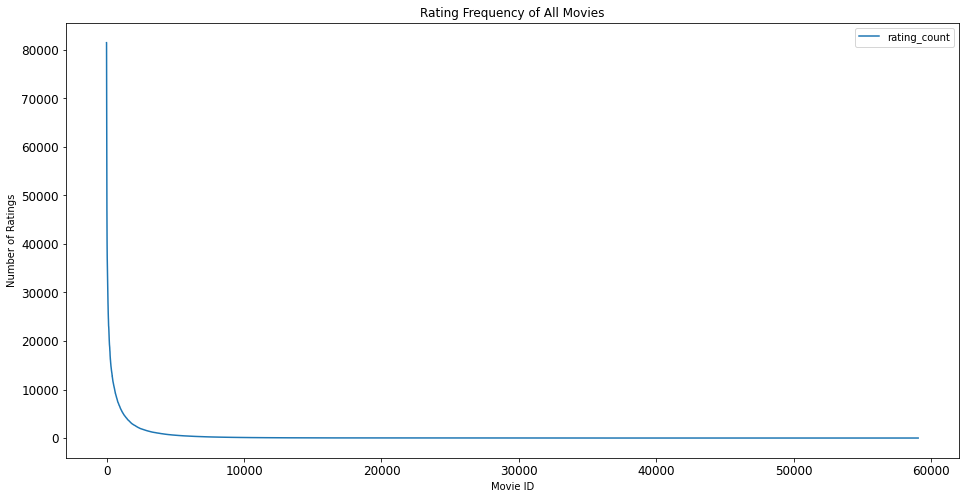

In [13]:
movie_count_rating_graph = movie_count_rating.copy()
movie_count_rating_graph.drop('weighted rating', axis=1, inplace=True)
movie_count_rating_graph.drop('average rating', axis=1, inplace=True)
movie_count_rating_graph.drop('movieId', axis=1, inplace=True)
ax = movie_count_rating_graph.sort_values('rating_count', ascending=False).reset_index(drop=True).plot(figsize=(16,8), title='Rating Frequency of All Movies', fontsize=12)

ax.set_xlabel('Movie ID')
ax.set_ylabel('Number of Ratings')

### 1.3 - Criando um modelo simples utilizando o KNN -  CF - Item Based

#### Removendo usuários "inativos"

In [14]:
# FILMES ATIVOS = FILMES COM UMA QUANTIDADE MINIMA DE RATINGS

# Como os dados são bem vazios, vamos pegar filtrar uma quantidade desses dados, utilizaremos apenas os usuários com mais de 50 ratings.

users_ratings_threshold = 50
active_users = list(set(user_count_rating.query("rating_count >= @users_ratings_threshold").index))

print('Shape of original ratings data: ', user_count_rating.shape)

user_count_rating_drop = user_count_rating[user_count_rating.index.isin(active_users)]
print('Shape of ratings data after dropping inactive users: ', user_count_rating_drop.shape)

user_count_rating_drop

Shape of original ratings data:  (162541, 1)
Shape of ratings data after dropping inactive users:  (102492, 1)


,rating_count
userId,
1,70
2,184
3,656
4,242
5,101
...,...
162536,79
162537,101
162538,154


#### Removendo filmes "inativos"

In [15]:
# FILMES ATIVOS = FILMES COM UMA QUANTIDADE MINIMA DE RATINGS

# Como os dados são bem vazios, vamos pegar filtrar uma quantidade desses dados, utilizaremos apenas os filmes com mais de 200.
movies_ratings_threshold = 20
active_movies = list(set(movie_count_rating.query("rating_count >= @movies_ratings_threshold").movieId))

print('Shape of original ratings data: ', movie_count_rating.shape)

movie_count_rating_drop = movie_count_rating[movie_count_rating.movieId.isin(active_movies)]
print('Shape of ratings data after dropping inactive movies: ', movie_count_rating_drop.shape)

movie_count_rating_drop

Shape of original ratings data:  (59047, 4)
Shape of ratings data after dropping inactive movies:  (18430, 4)


,movieId,average rating,rating_count,weighted rating
0,1,3.893708,57309,3.887824
1,2,3.251527,24228,3.248508
2,3,3.142028,11804,3.139640
3,4,2.853547,2523,2.884188
4,5,3.058434,11714,3.058875
...,...,...,...,...
58394,206805,3.190000,50,3.084185
58411,206845,3.250000,42,3.087862
58576,207309,3.216216,37,3.083283
58607,207405,3.730769,39,3.128269


In [16]:
# Pegando de data_cf apenas as colunas correspondentes aos filmes ativos e aos usuarios ativos
data_cf_active = data_cf[data_cf.movieId.isin(active_movies)]
data_cf_active = data_cf_active[data_cf_active.userId.isin(active_users)]

# Criando a user_movie_matrix
movie_user_matrix = create_sparse_matrix(data_cf_active).transpose()

movie_user_matrix = movie_user_matrix.tocsr()


In [17]:
print("Numero de avaliações nos filmes selecionados: ", data_cf_active.shape[0])
print("Numero de avaliações total: ", data_cf.shape[0])

Numero de avaliações nos filmes selecionados:  22921076
Numero de avaliações total:  25000095


In [26]:
# Criando o modelo knn
knn_cf = NearestNeighbors(n_neighbors=N_NEIGHBORS, algorithm='auto', metric='euclidean') # temos que mexer nos parâmetros posteriormente
# Treinando                                                                                                                                                      do com os dados 
knn_cf.fit(movie_user_matrix)

NearestNeighbors(metric='euclidean', n_neighbors=11)

In [28]:
print(movie_user_matrix)

  (1, 2)	3.5
  (1, 3)	4.0
  (1, 4)	3.0
  (1, 5)	4.0
  (1, 8)	4.0
  (1, 10)	3.5
  (1, 12)	4.0
  (1, 13)	4.0
  (1, 18)	3.0
  (1, 36)	5.0
  (1, 43)	4.0
  (1, 47)	2.0
  (1, 50)	4.0
  (1, 57)	4.0
  (1, 64)	4.0
  (1, 66)	3.0
  (1, 67)	3.0
  (1, 69)	3.0
  (1, 75)	5.0
  (1, 82)	4.0
  (1, 86)	5.0
  (1, 93)	5.0
  (1, 95)	5.0
  (1, 96)	5.0
  (1, 98)	5.0
  :	:
  (207830, 74608)	3.5
  (207830, 76916)	2.5
  (207830, 84146)	3.0
  (207830, 86570)	3.5
  (207830, 87441)	4.0
  (207830, 90785)	4.0
  (207830, 91400)	4.0
  (207830, 94239)	4.0
  (207830, 95998)	3.5
  (207830, 96408)	3.0
  (207830, 97074)	2.5
  (207830, 116275)	3.0
  (207830, 116544)	3.0
  (207830, 116843)	3.5
  (207830, 121308)	4.5
  (207830, 132358)	2.0
  (207830, 132596)	3.0
  (207830, 138037)	3.0
  (207830, 139435)	2.5
  (207830, 143568)	3.5
  (207830, 144301)	3.5
  (207830, 148647)	3.0
  (207830, 154088)	4.0
  (207830, 154546)	4.0
  (207830, 158109)	4.0


In [29]:
# criando função que gera recomendações basedo em um filme - utilizando um modelo KNN
def get_recommendations_cf(movie_name, model, data, printable=True): #nome do filme, modelo
    # Pegando o Id do filme que tenha o nome passado
    movieId = data.loc[data["title"] == movie_name]["movieId"].values[0]
    
    distances, suggestions = model.kneighbors(movie_user_matrix.getrow(movieId).todense().tolist(), n_neighbors=N_NEIGHBORS)
    
    if(printable):
        for i in range(0, len(distances.flatten())):
            if(i == 0):
                print('Recomendações para {0} (ID: {1}): \n '.format(movie_name, movieId))
            else:
                #caso sejam geradas menos que N_NEIGHBORS recomendações, exibem-se apenas as geradas
                if(np.size(data.loc[data["movieId"] == suggestions.flatten()[i]]["title"].values) > 0 and np.size(data.loc[data["movieId"] == suggestions.flatten()[i]]["movieId"].values[0]) > 0):
                    print('{0}: {1} (ID: {2}), com distância de {3}: '.format(i, data.loc[data["movieId"] == suggestions.flatten()[i]]["title"].values[0], data.loc[data["movieId"] == suggestions.flatten()[i]]["movieId"].values[0], distances.flatten()[i]))
    
    return distances, suggestions

In [30]:
# Função para pesquisar o nome correto do filme
def search_movies(search_word, data):
    return data[data.title.str.contains(search_word, flags=re.IGNORECASE)]
    #return movies_cf[movies_cf.movieId == 3561]

In [31]:
# Setando um tamanho de coluna, para ver o nome completo dos filmes
pd.set_option('display.max_colwidth', 500)
# Pesquisando filmes
search_movies("Klaus", data=data_cf_active).tail(20)

,movieId,title,userId,rating
24238273,131252,Forklift Driver Klaus: The First Day on the Job,118678,5.0
24238274,131252,Forklift Driver Klaus: The First Day on the Job,121089,3.5
24238275,131252,Forklift Driver Klaus: The First Day on the Job,121221,4.0
24238276,131252,Forklift Driver Klaus: The First Day on the Job,132651,2.5
24238277,131252,Forklift Driver Klaus: The First Day on the Job,134045,4.0
24238278,131252,Forklift Driver Klaus: The First Day on the Job,135672,3.5
24238279,131252,Forklift Driver Klaus: The First Day on the Job,136296,3.0
24238280,131252,Forklift Driver Klaus: The First Day on the Job,138804,3.5
24238281,131252,Forklift Driver Klaus: The First Day on the Job,139913,4.0
24238282,131252,Forklift Driver Klaus: The First Day on the Job,140659,4.5


# AUXILIO TEMPORARIO DE PESQUISA DE FILME

In [32]:
movie_count_rating_drop[movie_count_rating_drop["average rating"] >= 3.5].sort_values(by="weighted rating", ascending=True)

,movieId,average rating,rating_count,weighted rating
11684,53916,3.500000,20,3.091172
15983,84471,3.500000,20,3.091172
44149,173541,3.500000,20,3.091172
34113,148701,3.500000,20,3.091172
17787,93022,3.500000,20,3.091172
...,...,...,...,...
522,527,4.247579,60411,4.239593
1190,1221,4.261759,34188,4.247550
49,50,4.284353,55366,4.275372
840,858,4.324336,52498,4.314556


In [93]:
data_cf_active[data_cf_active.movieId == 4262]

,movieId,title,userId,rating
15153244,4262,Scarface,3,4.5
15153245,4262,Scarface,18,3.0
15153246,4262,Scarface,40,4.5
15153247,4262,Scarface,80,4.0
15153248,4262,Scarface,95,4.5
...,...,...,...,...
15168138,4262,Scarface,162495,1.0
15168140,4262,Scarface,162501,3.5
15168141,4262,Scarface,162512,4.0
15168142,4262,Scarface,162516,3.5


In [91]:
movie_count_rating_drop[movie_count_rating_drop["rating_count"] <= 15000].sort_values(by="rating_count", ascending=True)

,movieId,average rating,rating_count,weighted rating
33539,147002,3.000000,20,3.068077
44193,173629,3.250000,20,3.079625
33543,147010,3.850000,20,3.107338
44215,173673,3.900000,20,3.109648
15484,81681,3.275000,20,3.080779
...,...,...,...,...
1154,1183,3.619542,14748,3.604609
171,173,2.555360,14758,2.569407
1233,1266,3.994798,14802,3.969732
4158,4262,3.937383,14900,3.914026


In [35]:
data_cf_active.nunique()

movieId     18430
title       17757
userId     102492
rating         10
dtype: int64

# FIM DO AUXILIO TEMPORARIO

In [36]:
#Voltando a coluna ao normal 
pd.set_option('display.max_colwidth', 50)

In [94]:
movieName = "Scarface"
# Pegando recomendações
a, b = get_recommendations_cf(movieName, knn_cf, data_cf_active)

Recomendações para Scarface (ID: 4262): 
 
1: Boyz N the Hood (ID: 6796), com distância de 467.3408820122631: 
2: Escape from Alcatraz (ID: 8340), com distância de 468.30198590225945: 
3: Wall Street (ID: 4007), com distância de 470.86993957992263: 
4: History of Violence, A (ID: 37733), com distância de 471.1899829155964: 
5: Narc (ID: 5959), com distância de 471.2700924098621: 
6: Mean Streets (ID: 8042), com distância de 471.5045068713554: 
7: Dirty Harry (ID: 4855), com distância de 471.87259933164165: 
8: Commando (ID: 6664), com distância de 471.92610650397376: 
9: Layer Cake (ID: 27831), com distância de 472.6433644937798: 
10: Warriors, The (ID: 7802), com distância de 472.8839709696238: 


## 1.4 Utilizando umap para exibir os agrupamentos

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

%matplotlib inline

import umap
import umap.plot

In [39]:
# Tirando uma amostra
N = 2000 #numero de FILMES na amostra 
sample_indexes = np.random.choice(np.arange(movie_user_matrix.shape[0]),N, replace=False)
# Pegando a amostra
sample = movie_user_matrix[sample_indexes]

In [40]:
#caso queira restar a variavel

#%reset_selective trans
#%reset

In [41]:
%%time
trans = umap.UMAP(n_neighbors=N_NEIGHBORS, random_state=64, metric='euclidean').fit(movie_user_matrix)

Wall time: 6min 37s


In [42]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 80em; }</style>"))

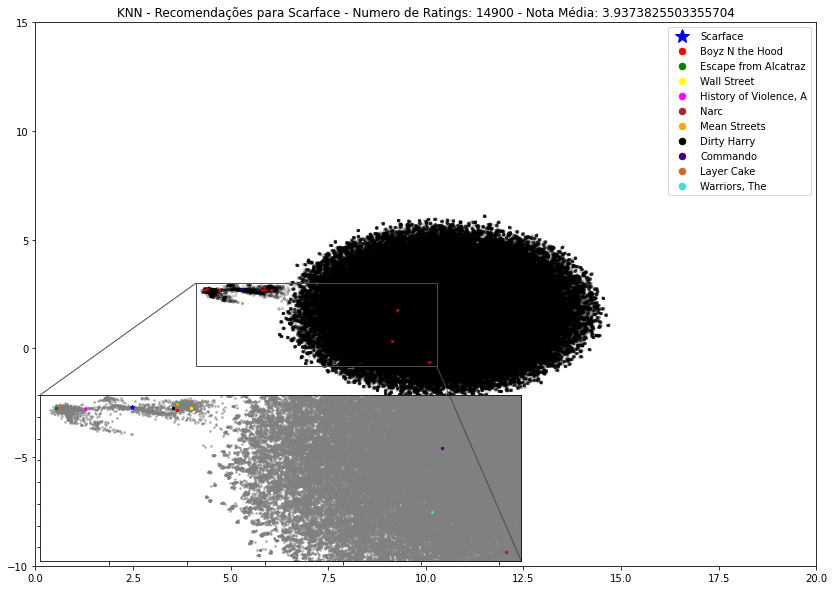

In [96]:
def plotKNN():
    # pegando a lista de recomendações
    recommendations_ids = b.flatten()
    averageRating = movie_count_rating_drop[movie_count_rating_drop['movieId'] == recommendations_ids[0]]['average rating']
    numRatings = movie_count_rating_drop[movie_count_rating_drop['movieId'] == recommendations_ids[0]]['rating_count']
    fig, ax = plt.subplots(figsize=(14, 10))

    # AREA DO GRAFICO BASE
    #mostrando os valores normais
    ax.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s=5, facecolors='black', cmap='Spectral', alpha=0.15, linewidths=1)
    #mostrando filme pedido pelo usuario
    ax.scatter(trans.embedding_[:, 0][recommendations_ids[0]], trans.embedding_[:, 1][recommendations_ids[0]], s=5, c='blue', cmap='Spectral', alpha=0.7)
    #mostrando filmes recomendados
    ax.scatter(trans.embedding_[:, 0][recommendations_ids[1:]], trans.embedding_[:, 1][recommendations_ids[1:]], s=5, c='red', cmap='Spectral', alpha=0.7)
    ax.set(title='KNN' + ' - Recomendações para ' + movieName + ' - Numero de Ratings: ' + str(numRatings.values[0]) +' - Nota Média: ' +  str(averageRating.values[0]))
    
#   ax.set_xlim(2.1962, 12)
#   ax.set_ylim(2.1962, 12)
    ax.set_xlim(0, 20)
    ax.set_ylim(-10, 15)
    # verificando se os pontos gerados são nan, se for, é impossivel exibir essas recomendações graficamente
    if(np.isnan(trans.embedding_[:, 0][recommendations_ids]).all() and np.isnan(trans.embedding_[:, 1][recommendations_ids]).all()):
        print("Não foi possivel gerar o gráfico para as recomendações de {0}, por favor tente outro filme.\n" .format(movieName))
        return
    
    # mostrando legenda
    colors_list =  ['blue', 'red', 'green', 'yellow', 'magenta', 'brown', 'orange', 'black', 'indigo', 'chocolate', 'turquoise']
    legend_list = []
    # filme
    filme_pesquisado = mlines.Line2D([],[], linestyle='None', color='blue', marker="*", markersize=15,
                                     label=list(data_cf_active[data_cf_active.movieId == recommendations_ids[0]].title)[0])
    legend_list.append(filme_pesquisado)
    
    for i in range(1, 11):
        filme_recomendado = mlines.Line2D([],[], linestyle='None', color=colors_list[i], marker=".", markersize=13,
                                       label=list(data_cf_active[data_cf_active.movieId == recommendations_ids[i]].title)[0])
    
        legend_list.append(filme_recomendado)
        
    ax.legend(handles=legend_list)
    
    
    #================================================================================================================
    # AREA DO ZOOM
    axins = zoomed_inset_axes(ax, 2, loc=3) # zoom = 8
    #axins.set(title='Recomendações para ' + movieName)
    #mostrando os valores normais
    axins.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s=3, facecolors='grey', cmap='Spectral', alpha=0.6, linewidths=0.7)
    
    
    #mostrando filme pedido pelo usuario
    axins.scatter(trans.embedding_[:, 0][recommendations_ids[0]], trans.embedding_[:, 1][recommendations_ids[0]], s=20, c='blue', cmap='Spectral', alpha=1, marker="*")
    
    #mostrando todos os filmes recomendados - essa linha abaixo pode ser comentada
    axins.scatter(trans.embedding_[:, 0][recommendations_ids[1:]], trans.embedding_[:, 1][recommendations_ids[1:]], s=5, c='red', cmap='Spectral', alpha=1)
   
    #mostrando os filmes 1 ao 10
    for i in range(1, 11):
        axins.scatter(trans.embedding_[:, 0][recommendations_ids[i]], trans.embedding_[:, 1][recommendations_ids[i]], s=5, c=colors_list[i], cmap='Spectral', alpha=1)
    
    
    #setando os limites do plot do zoom - min e max de cada axis + um offset
    offset = 0.2

    axins.set_xlim(np.nanmin(trans.embedding_[:, 0][recommendations_ids]) - offset, np.nanmax(trans.embedding_[:, 0][recommendations_ids]) + offset)
    axins.set_ylim(np.nanmin(trans.embedding_[:, 1][recommendations_ids]) - offset, np.nanmax(trans.embedding_[:, 1][recommendations_ids]) + offset)


    plt.xticks(visible=False)  # Not present ticks
    plt.yticks(visible=False)
    #
    ## draw a bbox of the region of the inset axes in the parent axes and
    ## connecting lines between the bbox and the inset axes area
    mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.3")

    plt.draw()
    plt.show()
    

plotKNN()

In [38]:
count1 = 0
for x, y in trans.embedding_:
    if(x >= 2.1962 or y >= 2.1962):
        count1 += 1
print(count1)

204364


In [362]:
count2 = 0
for x, y in trans.embedding_:
    if(x < 2.1962 or y < 2.1962 ):
        count2 += 1
print(count2)

176220


In [301]:
data_cf_active.nunique()

movieId     32720
title       31208
userId     102492
rating         10
dtype: int64

In [365]:
print(trans.embedding_.shape)

trans.graph_


(208940, 2)


<208940x208940 sparse matrix of type '<class 'numpy.float32'>'
	with 2824068 stored elements in Compressed Sparse Row format>

In [366]:
movie_user_matrix

<208940x162542 sparse matrix of type '<class 'numpy.float64'>'
	with 23054035 stored elements in Compressed Sparse Column format>

In [348]:
np.where(umap.utils.disconnected_vertices(trans) == True)

(array([  1706,   1740,   1764,   1774,   2619,   3904,  35681,  39048,
         62213,  74473,  77951,  87689,  93923,  94218,  95425,  96755,
         97730,  99260, 102807, 105040, 120950, 122234, 126554, 129005,
        131148, 132454, 134829, 135603, 135797, 136363, 138458, 139034,
        140295, 140325, 140559, 140707, 141367, 142384, 142817, 143115,
        143233, 144068, 144552, 145388, 146372, 146374, 146384, 146400,
        147436, 148052, 148168, 148438, 148484, 149588, 150352, 150876,
        151973, 152041, 152828, 152898, 153937, 155133, 155994, 157593,
        157771, 157995, 159207, 161028, 162666, 162814, 163470, 164001,
        164707, 164743, 166954, 167412, 167424, 167806, 168000, 168030,
        168952, 169096, 169114, 169524, 169592, 169726, 169854, 169872,
        171457, 171555, 171947, 172681, 172829, 173677, 174459, 174669,
        177091, 177263, 181365, 182223, 182673, 182813, 182893, 183375,
        183805, 184289, 184479, 185767, 186207, 187517, 188335, 

In [359]:
data_cf_active.shape

(23054035, 4)

In [90]:
print(b.flatten())

print(movie_user_matrix[593])

data_cf_active[data_cf_active.movieId == 593].sort_values(by="userId", ascending=True)

[ 527  593  590  150  110 2028  318  377  457  356  480]
  (0, 3)	4.0
  (0, 5)	5.0
  (0, 8)	4.0
  (0, 9)	5.0
  (0, 10)	4.5
  (0, 12)	4.0
  (0, 13)	4.5
  (0, 18)	4.0
  (0, 19)	4.0
  (0, 20)	5.0
  (0, 23)	5.0
  (0, 25)	5.0
  (0, 31)	3.0
  (0, 36)	4.0
  (0, 37)	4.5
  (0, 38)	3.5
  (0, 40)	4.0
  (0, 43)	3.5
  (0, 50)	4.5
  (0, 57)	4.5
  (0, 59)	4.5
  (0, 62)	4.5
  (0, 66)	3.0
  (0, 69)	5.0
  (0, 70)	3.5
  :	:
  (0, 162482)	3.5
  (0, 162484)	3.0
  (0, 162485)	4.0
  (0, 162486)	4.0
  (0, 162488)	4.0
  (0, 162489)	4.0
  (0, 162491)	3.0
  (0, 162492)	5.0
  (0, 162493)	5.0
  (0, 162495)	3.0
  (0, 162499)	4.5
  (0, 162501)	5.0
  (0, 162507)	5.0
  (0, 162509)	3.0
  (0, 162510)	4.0
  (0, 162513)	4.5
  (0, 162515)	4.0
  (0, 162516)	5.0
  (0, 162519)	5.0
  (0, 162524)	4.0
  (0, 162528)	4.0
  (0, 162529)	5.0
  (0, 162537)	5.0
  (0, 162538)	4.5
  (0, 162541)	4.0


,movieId,title,userId,rating
4019036,593,"Silence of the Lambs, The",3,4.0
4019037,593,"Silence of the Lambs, The",5,5.0
4019040,593,"Silence of the Lambs, The",8,4.0
4019041,593,"Silence of the Lambs, The",9,5.0
4019042,593,"Silence of the Lambs, The",10,4.5
...,...,...,...,...
4093158,593,"Silence of the Lambs, The",162528,4.0
4093159,593,"Silence of the Lambs, The",162529,5.0
4093160,593,"Silence of the Lambs, The",162537,5.0
4093161,593,"Silence of the Lambs, The",162538,4.5


array([ 527,  593,  590,  150,  110, 2028,  318,  377,  457,  356,  480],
      dtype=int64)

# todo: comparar graficos feitos com data_cf e data_cf_active